In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
d = pd.read_csv("C:/Users/dhani/OneDrive/Documents/CVIP/archive2/monthly.data.csv")

In [17]:
print(d.head(2))
d.shape

       STATION                 DATE REPORT_TYPE  SOURCE  AWND BackupElements  \
0  72518014735  2015-01-31T23:59:00       SOM         6   8.9         PRECIP   
1  72518014735  2015-02-28T23:59:00       SOM         6   8.7         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  ...  \
0              260         PLASTIC         42.6918        -73.83109  ...   
1              260         PLASTIC         42.6918        -73.83109  ...   

  MonthlyMeanTemperature  MonthlyMinSeaLevelPressureValue  \
0                   19.7                            29.32   
1                   12.7                            29.56   

   MonthlyMinSeaLevelPressureValueDate  MonthlyMinSeaLevelPressureValueTime  \
0                                   24                                 1707   
1                                   15                                  151   

   MonthlyMinimumTemperature  MonthlySeaLevelPressure  MonthlyStationPressure  \
0                       10.

(87, 46)

In [18]:
d.isnull().sum()


STATION                                         0
DATE                                            0
REPORT_TYPE                                     0
SOURCE                                          0
AWND                                            0
BackupElements                                  0
BackupElevation                                 0
BackupEquipment                                 0
BackupLatitude                                  0
BackupLongitude                                 0
BackupName                                      0
CDSD                                            0
CLDD                                            0
DSNW                                            0
HDSD                                            0
HTDD                                            0
MonthlyDaysWithGT001Precip                      0
MonthlyDaysWithGT010Precip                      0
MonthlyDaysWithGT32Temp                         0
MonthlyDaysWithGT90Temp                         0


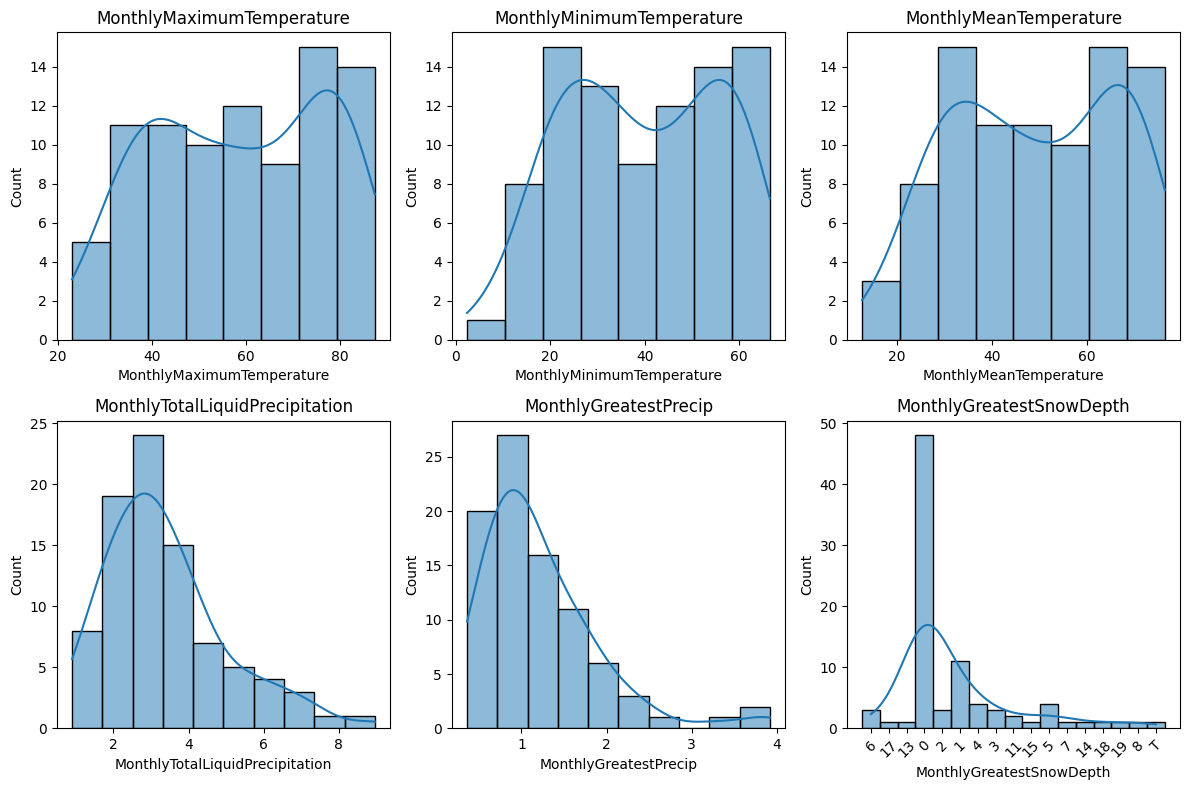

In [19]:
numerical_columns = [ 'MonthlyMaximumTemperature', 'MonthlyMinimumTemperature', 'MonthlyMeanTemperature','MonthlyTotalLiquidPrecipitation', 'MonthlyGreatestPrecip', 'MonthlyGreatestSnowDepth']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(d[column], kde=True)
    plt.title(column)
    plt.xlabel(column)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

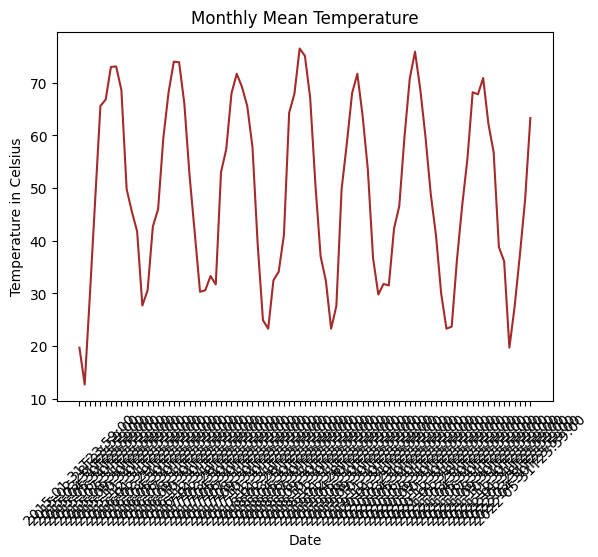

In [20]:
sns.lineplot(x="DATE", y="MonthlyMeanTemperature", data=d, color = "BROWN")
plt.title("Monthly Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature in Celsius")
plt.xticks(rotation=45)
plt.show()

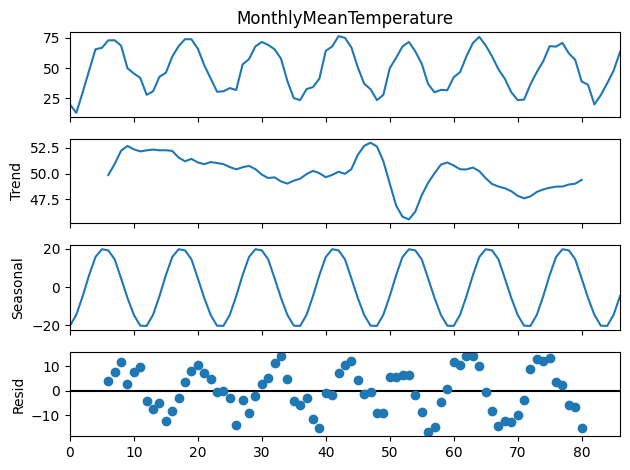

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
temperature_series = d['MonthlyMeanTemperature']
if len(temperature_series) >= 24:
    result = seasonal_decompose(temperature_series, model='additive', period=12)
    result.plot()
    plt.show()
else:
    print("Insufficient data for seasonal decomposition. Need at least 24 observations.")

In [10]:
d2 = pd.read_csv("C:/Users/dhani/OneDrive/Documents/CVIP/archive2/daily.data.csv")

In [11]:
print(d2.head(2))
d2.shape
     

       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T23:59:00       SOD         6         PRECIP   
1  72518014735  2015-01-02T23:59:00       SOD         6         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...                     190                  26   
1  NWS ALBANY, NY  ...                     250                  30   

   DailyPrecipitation  DailySnowDepth  DailySnowfall  \
0                   0               0              0   
1                   T               0              T   

   DailySustainedWindDirection  DailySustainedWindSpeed  Sunrise  Sunset  \
0                          190                       20      726    1632   
1                          310 

(2668, 32)

In [12]:
d2.isnull().sum()

STATION                                       0
DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                        0
DailyMaximumDryBulbTemperature          

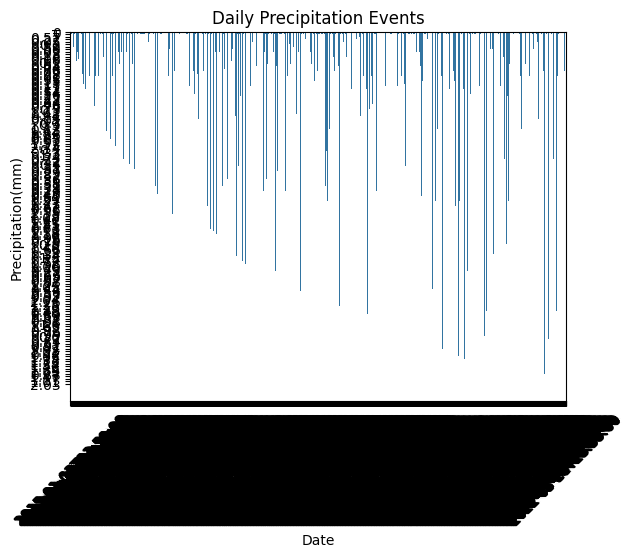

In [13]:
sns.barplot(x="DATE", y="DailyPrecipitation", data=d2)
plt.title("Daily Precipitation Events")
plt.xlabel("Date")
plt.ylabel("Precipitation(mm)")
plt.xticks(rotation=45)
plt.show()

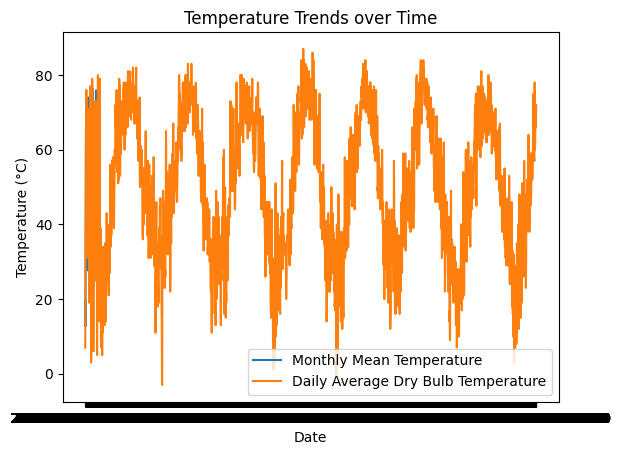

In [14]:
sns.lineplot(x="DATE", y="MonthlyMeanTemperature", data=d, label="Monthly Mean Temperature")
sns.lineplot(x="DATE", y="DailyAverageDryBulbTemperature", data=d2, label="Daily Average Dry Bulb Temperature")
plt.title("Temperature Trends over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

(2668, 1)


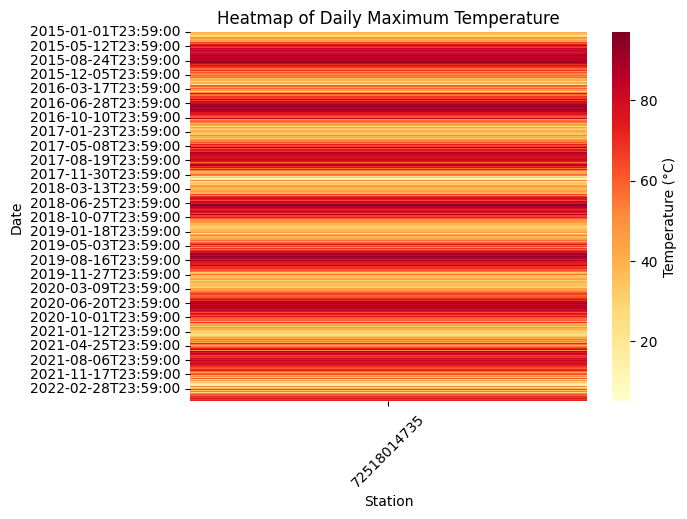

In [15]:
d2['DailyMaximumDryBulbTemperature'] = pd.to_numeric(d2['DailyMaximumDryBulbTemperature'], errors='coerce')
heatmap_data = d2.dropna().pivot(index="DATE", columns="STATION", values="DailyMaximumDryBulbTemperature")
sns.heatmap(heatmap_data, cmap="YlOrRd", cbar_kws={'label': 'Temperature (°C)'})
plt.title("Heatmap of Daily Maximum Temperature")
plt.xlabel("Station")
plt.ylabel("Date")
plt.xticks(rotation=45)
print(heatmap_data.shape)
plt.show()

In [21]:
d3 = pd.read_csv("C:/Users/dhani/OneDrive/Documents/CVIP/archive2/hourly.data.csv", low_memory=False)

In [22]:
print(d3.head(2))
d3.shape

       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T00:51:00       FM-15       7         PRECIP   
1  72518014735  2015-01-01T01:51:00       FM-15       7         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   

       BackupName  ... HourlyDryBulbTemperature HourlyPrecipitation  \
0  NWS ALBANY, NY  ...                       22                   0   
1  NWS ALBANY, NY  ...                       22                   0   

  HourlyRelativeHumidity HourlySeaLevelPressure  HourlyStationPressure  \
0                     46                  30.05                  29.72   
1                     48                  30.04                  29.71   

  HourlyVisibility HourlyWetBulbTemperature  HourlyWindDirection  \
0             10.0                       18               

(64729, 22)

In [23]:
d3.isnull().sum()

STATION                      0
DATE                         0
REPORT_TYPE                  0
SOURCE                       0
BackupElements               0
BackupElevation              0
BackupEquipment              0
BackupLatitude               0
BackupLongitude              0
BackupName                   0
HourlyAltimeterSetting       0
HourlyDewPointTemperature    0
HourlyDryBulbTemperature     0
HourlyPrecipitation          0
HourlyRelativeHumidity       0
HourlySeaLevelPressure       0
HourlyStationPressure        0
HourlyVisibility             0
HourlyWetBulbTemperature     0
HourlyWindDirection          0
HourlyWindSpeed              0
WindEquipmentChangeDate      0
dtype: int64

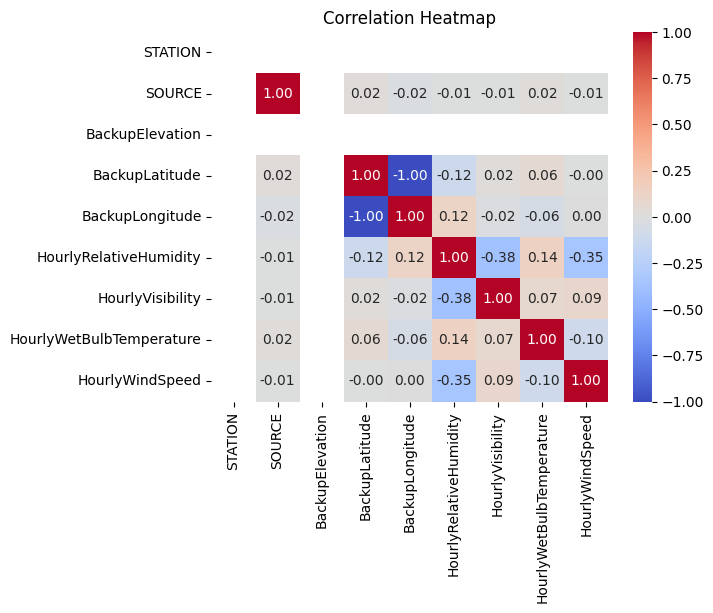

In [24]:
corr_matrix = d3.select_dtypes(include='number').dropna().corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

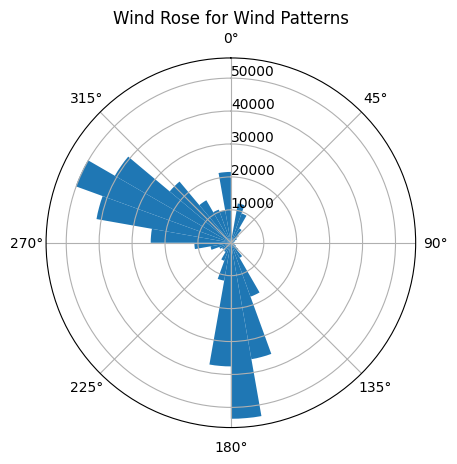

In [26]:
from math import pi
hdf = pd.read_csv("D:\\documents\\phase 2\\excel\\hourly.data.csv", low_memory=False)
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
wind_speed = hdf['HourlyWindSpeed']
wind_direction = hdf['HourlyWindDirection']
wind_direction_numeric = pd.to_numeric(wind_direction, errors='coerce')
# Filter out NaN values if necessary
valid_entries = ~np.isnan(wind_direction_numeric)
plt.hist(np.radians(wind_direction_numeric[valid_entries]), bins=36, weights=wind_speed[valid_entries])
plt.title("Wind Rose for Wind Patterns")
plt.show()

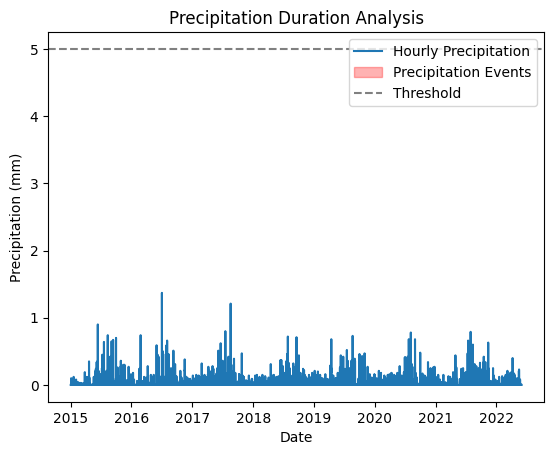

In [28]:
precipitation_threshold = 5
hdf = pd.read_csv("D:\\documents\\phase 2\\excel\\hourly.data.csv", low_memory=False)
hdf['HourlyPrecipitation'] = pd.to_numeric(hdf['HourlyPrecipitation'], errors='coerce')
hdf.dropna(subset=['HourlyPrecipitation'], inplace=True)
# Filter precipitation events based on the threshold
precipitation_events = hdf[hdf['HourlyPrecipitation'] > precipitation_threshold]
hdf['DATE'] = pd.to_datetime(hdf['DATE'])
hdf.set_index('DATE', inplace=True)
plt.plot(hdf.index, hdf['HourlyPrecipitation'], label="Hourly Precipitation")
plt.fill_between(hdf.index, 0, hdf['HourlyPrecipitation'], where=(hdf['HourlyPrecipitation'] > precipitation_threshold), color='red', alpha=0.3, label="Precipitation Events")
for date, value in zip(precipitation_events.index, precipitation_events['HourlyPrecipitation']):
    plt.annotate(f"{value:.2f} mm", (date, value), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.axhline(y=precipitation_threshold, color='gray', linestyle='--', label="Threshold")
plt.title("Precipitation Duration Analysis")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend(loc='upper right')
plt.show()

In [30]:
d4 = pd.read_csv("C:/Users/dhani/OneDrive/Documents/CVIP/archive2/threehourdata.csv")

In [31]:

print("Dataset Information:")
print(d4.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20843 entries, 0 to 20842
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STATION                    20843 non-null  int64  
 1   DATE                       20843 non-null  object 
 2   REPORT_TYPE                20843 non-null  object 
 3   SOURCE                     20843 non-null  int64  
 4   BackupElements             20843 non-null  object 
 5   BackupElevation            20843 non-null  int64  
 6   BackupEquipment            20843 non-null  object 
 7   BackupLatitude             20843 non-null  float64
 8   BackupLongitude            20843 non-null  float64
 9   BackupName                 20843 non-null  object 
 10  HourlyDewPointTemperature  20843 non-null  object 
 11  HourlyDryBulbTemperature   20843 non-null  object 
 12  HourlyPressureChange       20843 non-null  float64
 13  HourlyPressureTendency   

#### Display summary statistics

In [32]:
print("\nSummary Statistics:")
print(d4.describe())


Summary Statistics:
            STATION   SOURCE  BackupElevation  BackupLatitude  \
count  2.084300e+04  20843.0          20843.0    20843.000000   
mean   7.251801e+10      4.0            260.0       42.689777   
std    0.000000e+00      0.0              0.0        0.004166   
min    7.251801e+10      4.0            260.0       42.681200   
25%    7.251801e+10      4.0            260.0       42.691800   
50%    7.251801e+10      4.0            260.0       42.691800   
75%    7.251801e+10      4.0            260.0       42.691800   
max    7.251801e+10      4.0            260.0       42.691800   

       BackupLongitude  HourlyPressureChange  HourlyPressureTendency  \
count     20843.000000          20843.000000            20843.000000   
mean        -73.828305              0.001490                4.907835   
std           0.005734              0.049271                2.762154   
min         -73.831090             -0.320000                1.000000   
25%         -73.831090           

In [33]:
print("\nMissing Values:")
print(d4.isnull().sum())


Missing Values:
STATION                      0
DATE                         0
REPORT_TYPE                  0
SOURCE                       0
BackupElements               0
BackupElevation              0
BackupEquipment              0
BackupLatitude               0
BackupLongitude              0
BackupName                   0
HourlyDewPointTemperature    0
HourlyDryBulbTemperature     0
HourlyPressureChange         0
HourlyPressureTendency       0
HourlyRelativeHumidity       0
HourlySeaLevelPressure       0
HourlyStationPressure        0
HourlyVisibility             0
HourlyWetBulbTemperature     0
HourlyWindDirection          0
HourlyWindSpeed              0
WindEquipmentChangeDate      0
dtype: int64


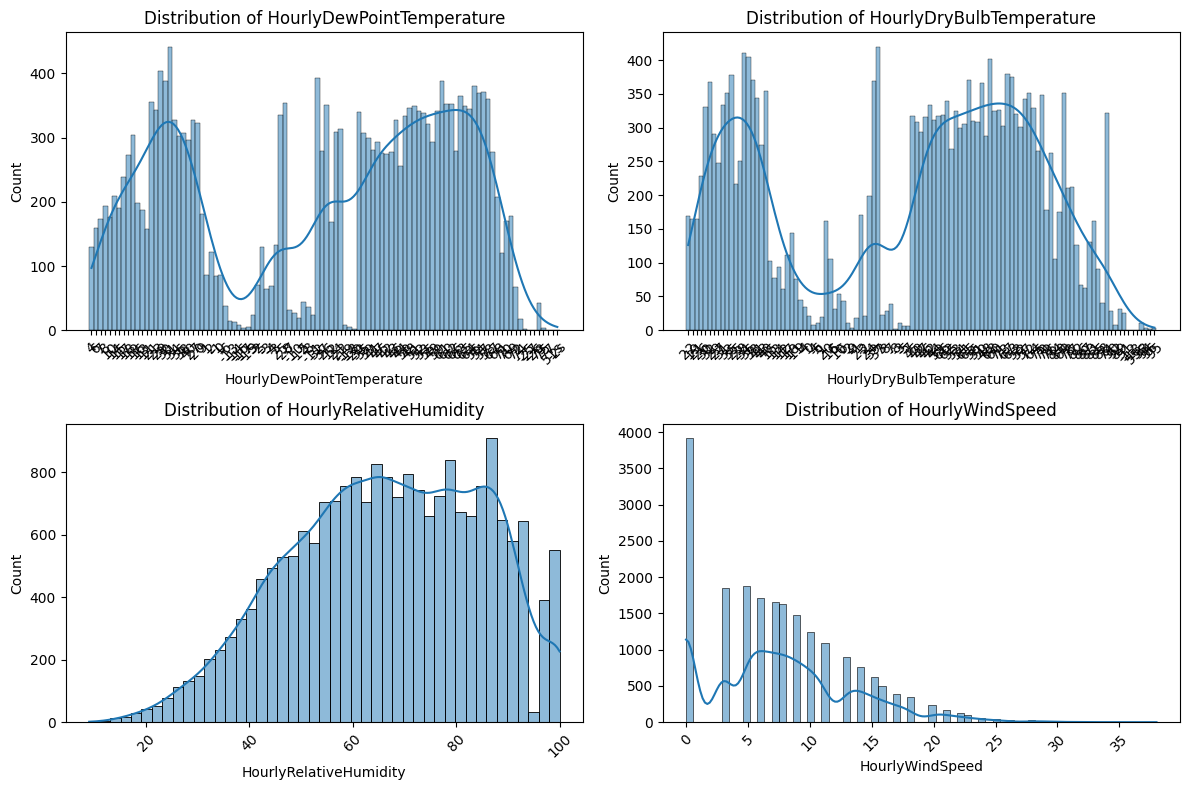

In [34]:
numerical_columns = ['HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlyWindSpeed']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(d4[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.xlabel(column)
plt.tight_layout()
plt.show()

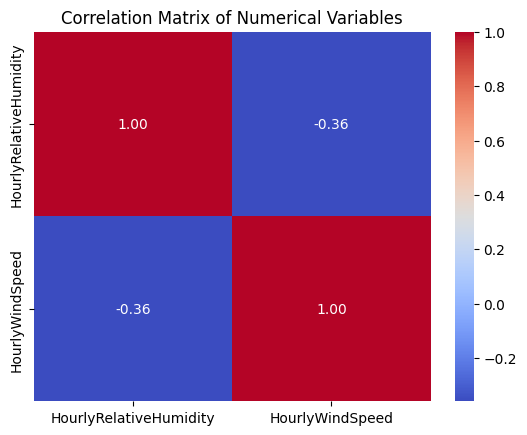

In [35]:
correlation_matrix = d4[numerical_columns].corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

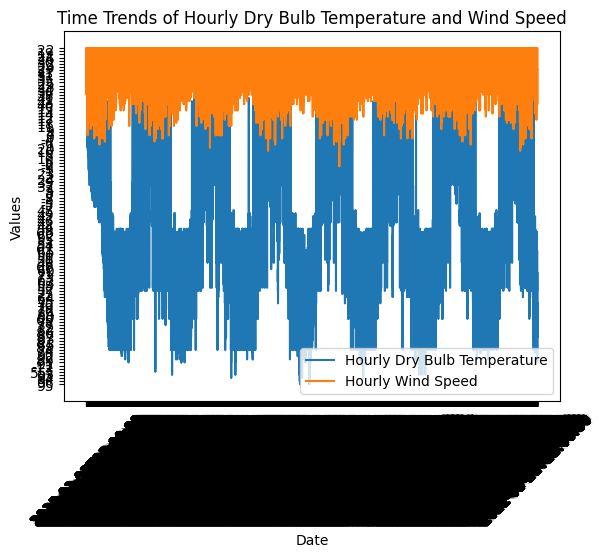

In [36]:
sns.lineplot(x='DATE', y='HourlyDryBulbTemperature', data=d4, label='Hourly Dry Bulb Temperature')
sns.lineplot(x='DATE', y='HourlyWindSpeed', data=d4, label='Hourly Wind Speed')
plt.title('Time Trends of Hourly Dry Bulb Temperature and Wind Speed')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show()
     